In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
#splitting data into training and testing sets
from sklearn.model_selection import train_test_split

#predicting the probability of a binary outcome using the logistic function
from sklearn.linear_model import LogisticRegression

#c measuring the proportion of correctly classified instances in a classification model
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler

In [3]:
#loarding data set
data = pd.read_csv("diabetes.csv")

In [4]:
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

<Axes: >

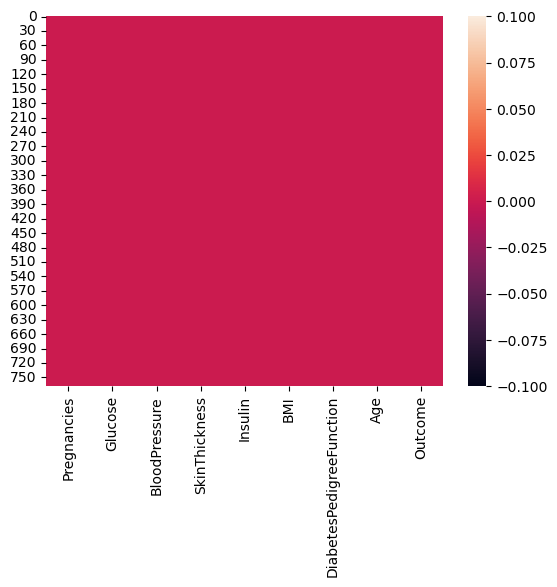

In [5]:
#checking for missing values
sns.heatmap(data.isnull())

In [6]:
#co relation matrix
correlation = data.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

In [83]:
#train test slpit
X = data.drop("Outcome",axis = 1)
Y = data['Outcome']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [84]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [85]:
prediction = model.predict(X_test)

In [86]:
print(prediction)

[0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1
 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0]


In [87]:
accuracy = accuracy_score(prediction,Y_test)

In [88]:
print(accuracy)

0.8116883116883117


In [89]:
# Save the trained model to a file
joblib.dump(model, 'trained_model.joblib')

['trained_model.joblib']